In [1]:
import scanpy as sc
import scycle as cc
import anndata
import os
import scipy
import numpy as np

ref_dir = '/home/clarice/Documents/SingleCell_PseudoTime/'

os.chdir(ref_dir)

## CHLA10

In [2]:
# Read from loom
chla10 = anndata.read_loom("data/CHLA10_S23.loom")
chla10.var_names_make_unique()

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [3]:
for layer in chla10.layers.keys(): # Sparse matrices break the pre-processing
    chla10.layers[layer] =  chla10.layers[layer].toarray()
chla10.X = chla10.X.toarray()

Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.30
Detected doublet rate = 6.4%
Estimated detectable doublet fraction = 55.6%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 11.5%
Elapsed time: 4.6 seconds
300 doublets encountered
4035 cells pass the doublet and counts filters.
4520  cells pass the mt filter
Cells selected 4021


(<Figure size 576x216 with 2 Axes>,
 array([<AxesSubplot:title={'center':'Observed transcriptomes'}, xlabel='Doublet score', ylabel='Prob. density'>,
        <AxesSubplot:title={'center':'Simulated doublets'}, xlabel='Doublet score', ylabel='Prob. density'>],
       dtype=object))

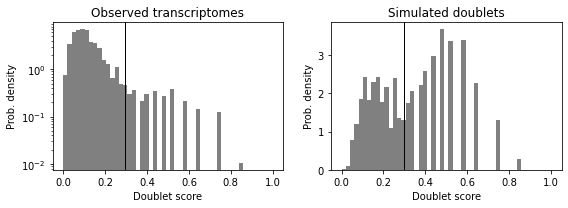

In [4]:
cc.pp.filter_cells(chla10)
chla10.uns['scrublet'].plot_histogram()

In [5]:
cc.pp.prep_pooling(chla10)

Preparing embedding...
Embedding for pooling...
Pooling 4021 cells...
Scoring cell cycle...


In [6]:
cc.pp.normalize_by_partition(chla10, n_ref_parts=10)

Preprocessing reference with default values...
-- Running `tl.principal_circle` with n_ref_parts...
The initial number of nodes must be at least 3. This will be fixed
Generating the initial configuration
Creating a circle in the plane induced by the 1st and 2nd PCs with 3 nodes
90% of the points have been used as initial conditions. Resetting.
Constructing tree 1 of 1 / Subset 1 of 1
Performing PCA
Using standard PCA
4 dimensions are being used
100.0 % of the original variance has been retained
The elastic matrix is being used. Edge configuration will be ignored
Computing EPG with  10  nodes on  4021  points and  4  dimensions
Nodes =  3 4 5 6 7 8 9 

BARCODE	ENERGY	NNODES	NEDGES	NRIBS	NSTARS	NRAYS	NRAYS2	MSE	MSEP	FVE	FVEP	UE	UR	URN	URN2	URSD

0||10	0.0002	10	10	10	0	0	0	0.0001	0.0001	0.8724	0.8919	0.0	0.0	0.0004	0.0043	0


0.0917  seconds elapsed
Re-normalizing counts by partition...


In [7]:
cc.tl.dimensionality_reduction(chla10, 'ica')

-- Dimensionality reduction using ICA...
-- Done


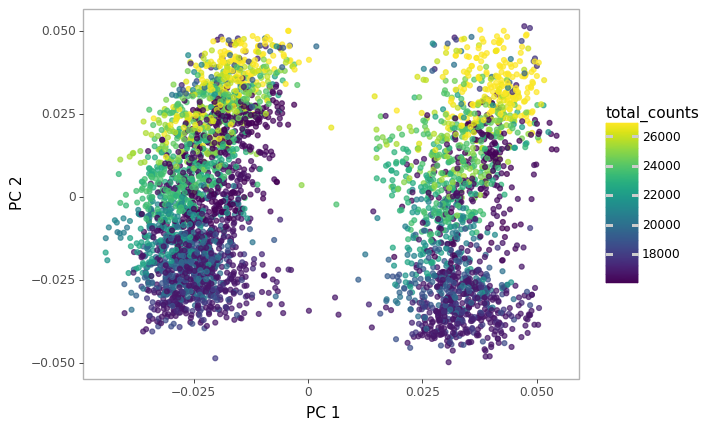

<ggplot: (8783436445165)>

In [8]:
# Before enrich components
cc.pl.scatter_projection(chla10)

--- Selected components:
G1/S: 0 (score=7.955083)
G2/M: 3 (score=11.271371)
G2/M-: 7 (score=7.792613)
Histones: 4 (score=19.332253)


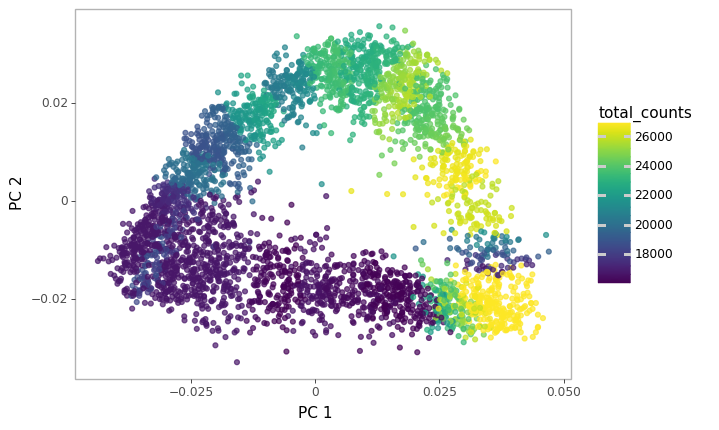

<ggplot: (8783436438921)>

In [9]:
# After enrich components
cc.tl.enrich_components(chla10)
cc.pl.scatter_projection(chla10)

In [10]:
cc.tl.principal_circle(chla10)

The initial number of nodes must be at least 3. This will be fixed
Generating the initial configuration
Creating a circle in the plane induced by the 1st and 2nd PCs with 3 nodes
90% of the points have been used as initial conditions. Resetting.
Constructing tree 1 of 1 / Subset 1 of 1
Performing PCA
Using standard PCA
4 dimensions are being used
100.0 % of the original variance has been retained
The elastic matrix is being used. Edge configuration will be ignored
Computing EPG with  30  nodes on  4021  points and  4  dimensions
Nodes =  3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 

BARCODE	ENERGY	NNODES	NEDGES	NRIBS	NSTARS	NRAYS	NRAYS2	MSE	MSEP	FVE	FVEP	UE	UR	URN	URN2	URSD

0||30	0.0001	30	30	30	0	0	0	0.0001	0.0001	0.9346	0.9393	0.0	0.0	0.0002	0.0059	0


0.7531  seconds elapsed


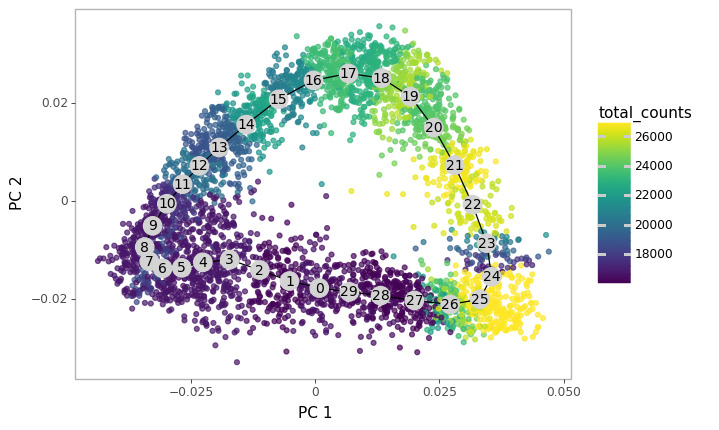

<ggplot: (8783496097777)>

In [11]:
cc.pl.scatter_projection(chla10, trajectory = True)

In [12]:
cc.pl.scatter_projection3d(chla10, trajectory = True)

Suggested moment of cell division: [26 27]
Direction of cell cycle: 1


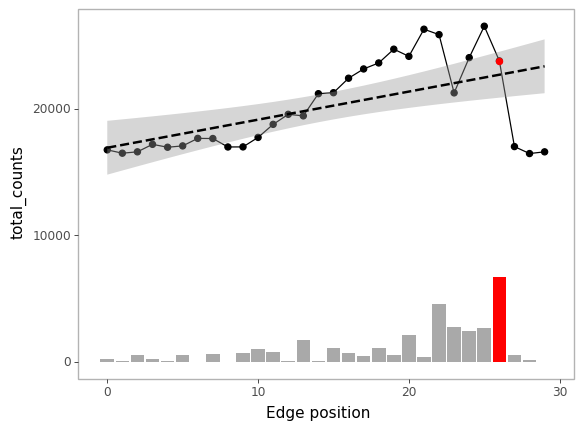

<ggplot: (8783496079093)>

In [13]:
cc.tl.celldiv_moment(chla10)
cc.pl.lineplot_celldiv_moment(chla10)

In [14]:
cc.tl.remap_nodes(chla10)

Remapping edges using [26 27] ...


In [15]:
cc.tl.pseudotime(chla10)

Calculating pseudotimes for each cell...


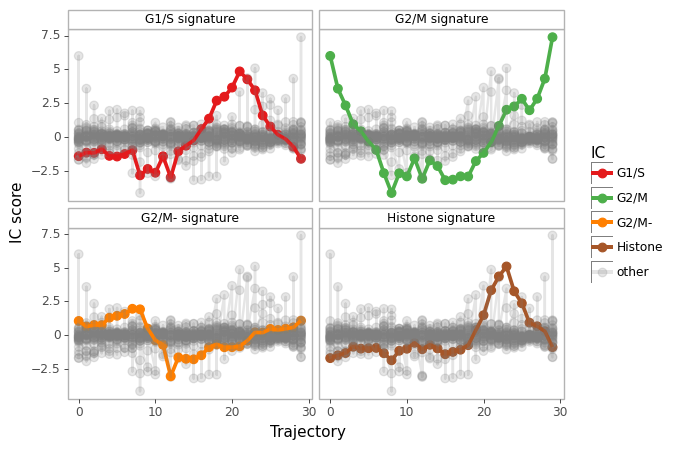

<ggplot: (8783480714905)>

In [16]:
cc.pl.scatter_enrich_components(chla10)

/home/clarice/anaconda3/lib/python3.7/site-packages/plotnine/utils.py:1246: FutureWarning:

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead



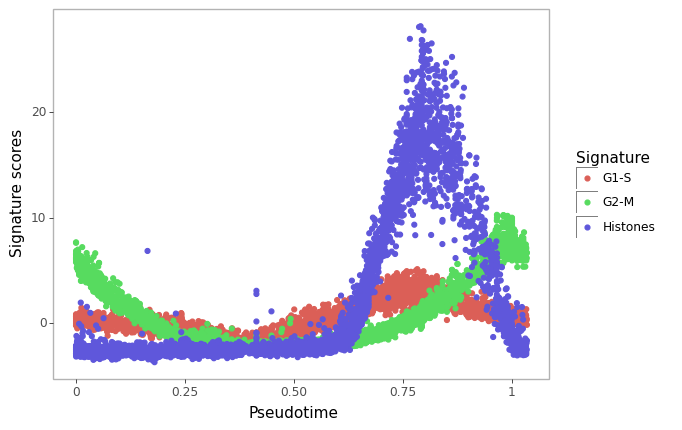

<ggplot: (8783480581457)>

In [17]:
cc.pl.scatter_cell_cycle(chla10)

In [18]:
cc.tl.curvature(chla10)
cc.tl.cell_cycle_phase(chla10)

-- Suggested cell cycle division:
G1:  0   - 0.26666666666666666
S:  0.26666666666666666 - 0.4
G2: 0.4 - 0.7
M:  0.7 -   1


In [19]:
cc.tl.annotate_cell_cycle(chla10, s_start = 0.4, g2_start = 0.7, m_start = 0.95)

/home/clarice/anaconda3/lib/python3.7/site-packages/plotnine/utils.py:1246: FutureWarning:

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead

/home/clarice/anaconda3/lib/python3.7/site-packages/plotnine/layer.py:464: PlotnineWarning:

geom_vline : Removed 1 rows containing missing values.



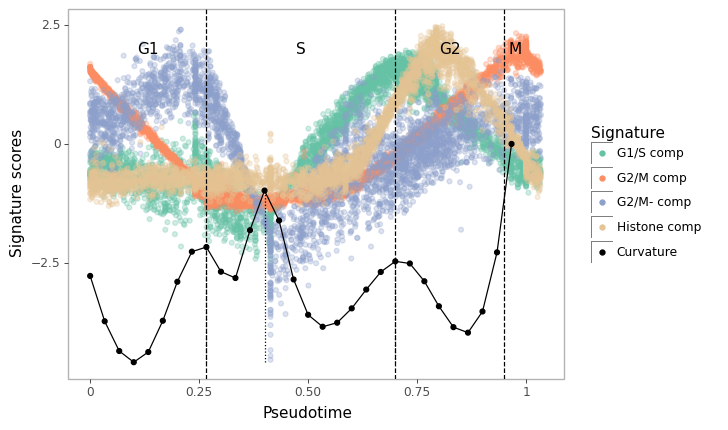

<ggplot: (8783478463985)>

In [21]:
cc.pl.scatter_cell_cycle(chla10, 'components', alpha = 0.3)

/home/clarice/anaconda3/lib/python3.7/site-packages/plotnine/utils.py:1246: FutureWarning:

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead



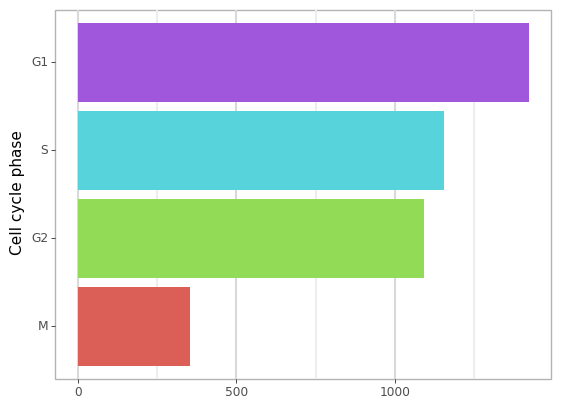

<ggplot: (8783312777865)>

In [24]:
cc.pl.barplot_cycle_phase(chla10)

In [27]:
cc.pl.scatter_projection3d(chla10, 'cell_cycle_phase', trajectory = True)

## CHLA9

In [52]:
chla9 = anndata.read_loom('data/CHLA9.loom')
chla9.var_names_make_unique()
for layer in chla9.layers.keys(): # Sparse matrices break the pre-processing
    chla9.layers[layer] =  chla9.layers[layer].toarray()
chla9.X = chla9.X.toarray()

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [53]:
cc.pp.filter_cells(chla9)
cc.pp.prep_pooling(chla9)
cc.pp.normalize_by_partition(chla9, n_ref_parts=10)

Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.72
Detected doublet rate = 0.1%
Estimated detectable doublet fraction = 1.0%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 13.3%
Elapsed time: 5.5 seconds
7 doublets encountered
4208 cells pass the doublet and counts filters.
4599  cells pass the mt filter
Cells selected 4132
Preparing embedding...
Embedding for pooling...
Pooling 4132 cells...
Scoring cell cycle...
Preprocessing reference with default values...
-- Running `tl.principal_circle` with n_ref_parts...
The initial number of nodes must be at least 3. This will be fixed
Generating the initial configuration
Creating a circle in the plane induced by the 1st and 2nd PCs with 3 nodes
90% of the points have been used as initial conditions. Resetting.
Constructing tree 1 of 1 / Subset 1 of 1
Performing PCA
Using standard PCA
4 dimensions are being used
100.0 % of the 

In [54]:
cc.tl.dimensionality_reduction(chla9, method = 'ica')
cc.tl.enrich_components(chla9)

-- Dimensionality reduction using ICA...
-- Done
--- Selected components:
G1/S: 1 (score=6.901216)
G2/M: 5 (score=10.473076)
G2/M-: 8 (score=6.078215)
Histones: 3 (score=19.482076)


The initial number of nodes must be at least 3. This will be fixed
Generating the initial configuration
Creating a circle in the plane induced by the 1st and 2nd PCs with 3 nodes
90% of the points have been used as initial conditions. Resetting.
Constructing tree 1 of 1 / Subset 1 of 1
Performing PCA
Using standard PCA
4 dimensions are being used
100.0 % of the original variance has been retained
The elastic matrix is being used. Edge configuration will be ignored
Computing EPG with  30  nodes on  4132  points and  4  dimensions
Nodes =  3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 

BARCODE	ENERGY	NNODES	NEDGES	NRIBS	NSTARS	NRAYS	NRAYS2	MSE	MSEP	FVE	FVEP	UE	UR	URN	URN2	URSD

0||30	0.0001	30	30	30	0	0	0	0.0001	0.0001	0.9261	0.9304	0.0	0.0	0.0003	0.0088	0


0.8615  seconds elapsed


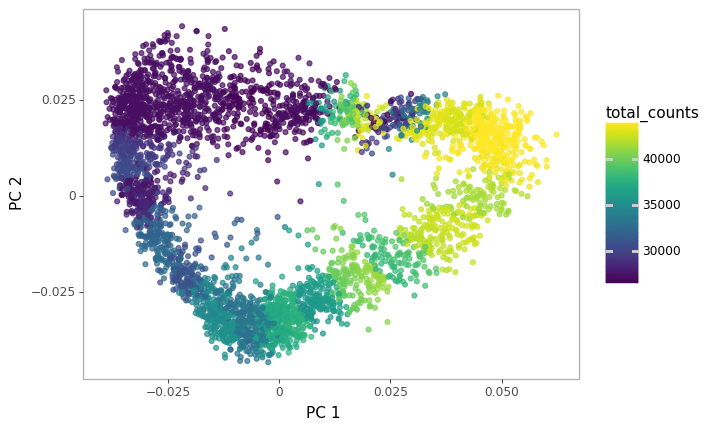

<ggplot: (8783423512593)>

In [55]:
cc.tl.principal_circle(chla9)
cc.pl.scatter_projection(chla9)

In [59]:
chla9

AnnData object with n_obs × n_vars = 4132 × 10000
    obs: 'TotalUMIs', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'doublet_scores', 'predicted_doublets', 'G1-S', 'G2-M', 'Histones', 'total_counts_raw', 'partition'
    var: 'Accession', 'AccessionVersion', 'Aliases', 'CcdsID', 'Chromosome', 'ChromosomeEnd', 'ChromosomeStart', 'CosmicID', 'DnaBindingDomain', 'FullName', 'GeneType', 'HgncID', 'IsTF', 'Location', 'LocationSortable', 'LocusGroup', 'LocusType', 'MgdID', 'MirBaseID', 'OmimID', 'PubmedID', 'RefseqID', 'RgdID', 'UcscID', 'UniprotID', 'VegaID', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'scrublet', 'scycle', 'log1p', 'dimRed', 'egr', 'princirc_gr'
    obsm: 'X_dimRed', 'X_pca_scycle', 'X_cc'
    varm: 'P_dimRed'
    layers: 'matrix', 'spliced', 'unspliced'

In [60]:
chla10

AnnData object with n_obs × n_vars = 4021 × 10000
    obs: 'TotalUMIs', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'doublet_scores', 'predicted_doublets', 'G1-S', 'G2-M', 'Histones', 'total_counts_raw', 'partition', 'pseudotime', 'cell_cycle_phase', 'G1/S comp', 'G2/M comp', 'G2/M- comp', 'Histone comp'
    var: 'Accession', 'AccessionVersion', 'Aliases', 'CcdsID', 'Chromosome', 'ChromosomeEnd', 'ChromosomeStart', 'CosmicID', 'DnaBindingDomain', 'FullName', 'GeneType', 'HgncID', 'IsTF', 'Location', 'LocationSortable', 'LocusGroup', 'LocusType', 'MgdID', 'MirBaseID', 'OmimID', 'PubmedID', 'RefseqID', 'RgdID', 'UcscID', 'UniprotID', 'VegaID', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'scrublet', 'scycle', 'log1p', 'dimRed', 'egr', 'princirc_gr'
    obsm: 'X_dimRed', 'X_pca_scycle', 'X_cc'
    varm: 'P_dimRed'
    layers: 'matrix', 'spliced', 'unspliced'

In [63]:
cc.tl.integration(chla9, chla10)

IndexError: index 30 is out of bounds for axis 0 with size 30